In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("./simulation_results_20230801132424/results.csv")
data

,agent,timestep,story_item,adopted,prob,Narrative,Social,Alignment
0,0,0,1,False,NaN,NaN,NaN,NaN
1,0,0,3,False,0.47313,0.340604,0.177371,1.0
2,0,0,9,False,NaN,NaN,NaN,NaN
3,0,0,10,False,NaN,NaN,NaN,NaN
4,0,0,2,False,0.32313,0.340604,0.177371,0.5
...,...,...,...,...,...,...,...,...
3505,29,8,5,True,NaN,NaN,NaN,NaN
3506,29,8,6,True,NaN,NaN,NaN,NaN
3507,29,8,8,True,NaN,NaN,NaN,NaN
3508,29,8,12,True,NaN,NaN,NaN,NaN


In [5]:
speed = data.groupby(["timestep","story_item"]).adopted.sum().reset_index()
speed['adopted'] = speed['adopted']/30
speed 


,timestep,story_item,adopted
0,0,1,0.100000
1,0,2,0.100000
2,0,3,0.200000
3,0,4,0.133333
4,0,5,0.266667
...,...,...,...
112,8,9,1.000000
113,8,10,1.000000
114,8,11,1.000000
115,8,12,1.000000


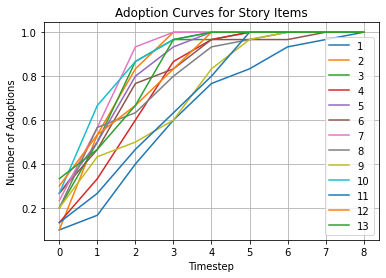

In [7]:
import matplotlib.pyplot as plt
for name, group in speed.groupby('story_item'):
    plt.plot(group['timestep'], group['adopted'], label=name)

plt.legend()
plt.title('Adoption Curves for Story Items')
plt.xlabel('Timestep')
plt.ylabel('Number of Adoptions')
plt.grid(True)
plt.show()

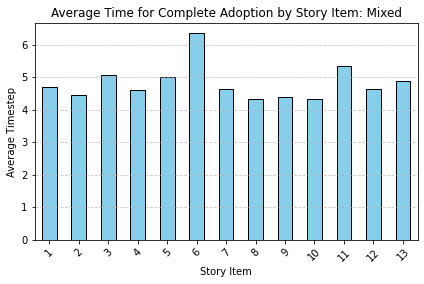

In [32]:
data = pd.read_csv("./mixed_condition_20230801140922/results.csv")
trials = data.groupby(['Trial','timestep','story_item']).adopted.sum().reset_index()

completely_adopted = trials[trials['adopted'] ==30]

# Group by `story_item` and `Trial`, then get the first occurrence for each combination
first_adoption = completely_adopted.groupby(['story_item', 'Trial']).first().reset_index()

# Group by `story_item` and compute the mean timestep for each story item
mx_avg_time_for_adoption = first_adoption.groupby('story_item')['timestep'].mean()

mx_avg_time_for_adoption.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Time for Complete Adoption by Story Item: Mixed')
plt.xlabel('Story Item')
plt.ylabel('Average Timestep')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


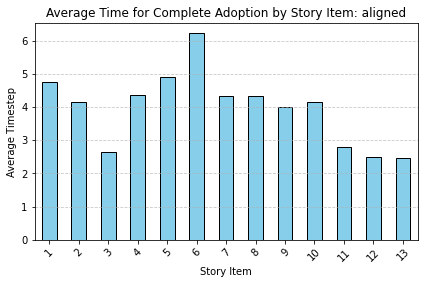

In [33]:
data = pd.read_csv("./aligned_condition_20230801141242/results.csv")
trials = data.groupby(['Trial','timestep','story_item']).adopted.sum().reset_index()

completely_adopted = trials[trials['adopted'] ==30]

# Group by `story_item` and `Trial`, then get the first occurrence for each combination
first_adoption = completely_adopted.groupby(['story_item', 'Trial']).first().reset_index()

# Group by `story_item` and compute the mean timestep for each story item
al_avg_time_for_adoption = first_adoption.groupby('story_item')['timestep'].mean()

al_avg_time_for_adoption.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Time for Complete Adoption by Story Item: aligned')
plt.xlabel('Story Item')
plt.ylabel('Average Timestep')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


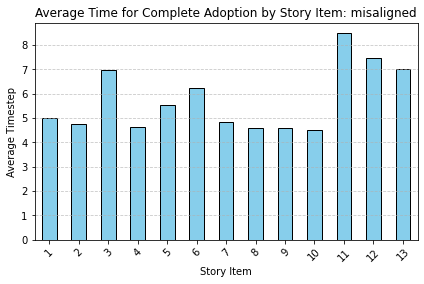

In [34]:
data = pd.read_csv("./misaligned_condition_20230801141608/results.csv")
trials = data.groupby(['Trial','timestep','story_item']).adopted.sum().reset_index()

completely_adopted = trials[trials['adopted'] ==30]

# Group by `story_item` and `Trial`, then get the first occurrence for each combination
first_adoption = completely_adopted.groupby(['story_item', 'Trial']).first().reset_index()

# Group by `story_item` and compute the mean timestep for each story item
ma_avg_time_for_adoption = first_adoption.groupby('story_item')['timestep'].mean()

ma_avg_time_for_adoption.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Time for Complete Adoption by Story Item: misaligned')
plt.xlabel('Story Item')
plt.ylabel('Average Timestep')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [35]:
al_avg_time_for_adoption

story_item
1     4.75
2     4.17
3     2.66
4     4.37
5     4.90
6     6.23
7     4.35
8     4.35
9     4.02
10    4.15
11    2.80
12    2.50
13    2.48
Name: timestep, dtype: float64

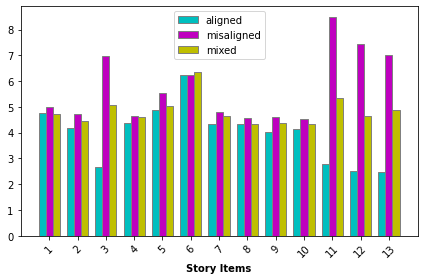

In [41]:
import numpy as np
# Set the width of the bars
barWidth = 0.25

# Set the position of bars on x axis
r1 = np.arange(len(al_avg_time_for_adoption))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, al_avg_time_for_adoption, color='c', width=barWidth, edgecolor='grey', label='aligned')
plt.bar(r2, ma_avg_time_for_adoption, color='m', width=barWidth, edgecolor='grey', label='misaligned')
plt.bar(r3, mx_avg_time_for_adoption, color='y', width=barWidth, edgecolor='grey', label='mixed')

# Label the x-axis
plt.xlabel('Story Items', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(al_avg_time_for_adoption))], al_avg_time_for_adoption.index, rotation=45)

# Create legend & display the plot
plt.legend()
plt.tight_layout()
plt.show()

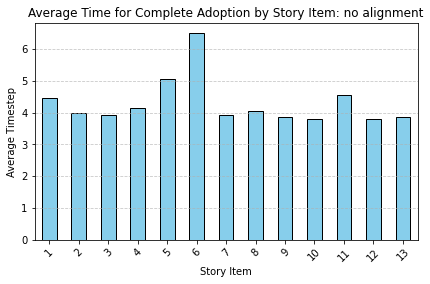

In [46]:
data = pd.read_csv("./no_alignment_20230801144745/results.csv")
trials = data.groupby(['Trial','timestep','story_item']).adopted.sum().reset_index()

completely_adopted = trials[trials['adopted'] ==30]

# Group by `story_item` and `Trial`, then get the first occurrence for each combination
first_adoption = completely_adopted.groupby(['story_item', 'Trial']).first().reset_index()

# Group by `story_item` and compute the mean timestep for each story item
nn_avg_time_for_adoption = first_adoption.groupby('story_item')['timestep'].mean()

nn_avg_time_for_adoption.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Time for Complete Adoption by Story Item: no alignment')
plt.xlabel('Story Item')
plt.ylabel('Average Timestep')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()